In [3]:
import pandas as pd

from numpy import sort

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel



from xgboost import plot_importance

from matplotlib import pyplot

import os


In [4]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [5]:
pahtname=r'D:\DataSets\ML-Long_S50M15_07To1Q21.csv'


filepath= os.path.abspath(pahtname)

dataset =pd.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)
dataset.drop(columns=['open','high','low','close'],inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75006 entries, 2007-01-03 09:45:00 to 2021-03-31 16:45:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indy_ma-550             75006 non-null  float64
 1   indy_ma-1100            75006 non-null  float64
 2   indy_hh-550             75006 non-null  float64
 3   indy_ll-550             75006 non-null  float64
 4   indy_mid-550            75006 non-null  float64
 5   indy_hh2-1100           75006 non-null  float64
 6   indy_ll2-1100           75006 non-null  float64
 7   indy_mid2-1100          75006 non-null  float64
 8   indy_macd110-440        75006 non-null  float64
 9   indy_signal110-440-110  75006 non-null  float64
 10  indy_hist_macd110-440   75006 non-null  float64
 11  indy_rsi25-ma20         75006 non-null  float64
 12  indy_6ATRTrail_DC-110   75006 non-null  float64
 13  cate_3trend-550_ma110   75006 non-null  int64  
 14  cat

# Train By MyPeriod

In [7]:
df=dataset['01-2007':'12-2020']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73657 entries, 2007-01-03 09:45:00 to 2020-12-30 16:45:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indy_ma-550             73657 non-null  float64
 1   indy_ma-1100            73657 non-null  float64
 2   indy_hh-550             73657 non-null  float64
 3   indy_ll-550             73657 non-null  float64
 4   indy_mid-550            73657 non-null  float64
 5   indy_hh2-1100           73657 non-null  float64
 6   indy_ll2-1100           73657 non-null  float64
 7   indy_mid2-1100          73657 non-null  float64
 8   indy_macd110-440        73657 non-null  float64
 9   indy_signal110-440-110  73657 non-null  float64
 10  indy_hist_macd110-440   73657 non-null  float64
 11  indy_rsi25-ma20         73657 non-null  float64
 12  indy_6ATRTrail_DC-110   73657 non-null  float64
 13  cate_3trend-550_ma110   73657 non-null  int64  
 14  cat

In [8]:
# split data into X and y
label=df.columns[len(df.columns)-1]

X_df = dataset.drop(columns=label)
Y_df = dataset[label]

In [9]:
display('X_df.head(3)','X_df.tail(3)')

,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2007-01-03 09:45:00,1.10,1.11,1.15,0.91,0.0022,1.15,0.91,0.0022,-22.50,-27.20,4.70,39.11,1.03,1,0,3,2
2007-01-03 10:00:00,1.09,1.10,1.14,0.89,0.0022,1.14,0.89,0.0022,-22.50,-27.19,4.68,39.05,1.02,1,0,3,2
2007-01-03 10:15:00,1.09,1.11,1.15,0.90,0.0022,1.15,0.90,0.0022,-22.53,-27.17,4.64,38.91,1.03,1,0,3,2
,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2021-03-31 16:15:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.53,1.14,1.39,46.28,1.0,3,0,3,4
2021-03-31 16:30:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.58,1.12,1.46,46.08,1.0,3,0,3,4
2021-03-31 16:45:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.61,1.11,1.51,45.92,1.0,3,0,3,4


In [10]:
Y_df.head(3)

datetime
2007-01-03 09:45:00    0
2007-01-03 10:00:00    0
2007-01-03 10:15:00    0
Name: LongSignal, dtype: int64

In [11]:
X=X_df.to_numpy()
y=Y_df.to_numpy()


# Train All Data

In [13]:

strategyName='LongAct'


algoName='XBG'
if strategyName=='LongAct':
 nTree=80
 learnRate=0.1
else:
 nTree=160
 learnRate=0.05  
    
mxDepth=8

model = XGBClassifier(n_estimators=nTree,max_depth=mxDepth,learning_rate=learnRate,importance_type='gain')

#model=GradientBoostingClassifier(n_estimators=nTree,max_depth=mxDepth,learning_rate=learnRate)

model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=80, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
# feature importance
print(model.feature_importances_)


[0.02375837 0.55615556 0.07534394 0.01988057 0.03057975 0.06563856
 0.02141913 0.02857405 0.03986526 0.02295814 0.01654898 0.01045701
 0.00817839 0.02626047 0.0206393  0.02028279 0.01345978]


In [15]:
X_df.columns

Index(['indy_ma-550', 'indy_ma-1100', 'indy_hh-550', 'indy_ll-550',
       'indy_mid-550', 'indy_hh2-1100', 'indy_ll2-1100', 'indy_mid2-1100',
       'indy_macd110-440', 'indy_signal110-440-110', 'indy_hist_macd110-440',
       'indy_rsi25-ma20', 'indy_6ATRTrail_DC-110', 'cate_3trend-550_ma110',
       'cate_2trend-1100_ma220', 'cate_rannkHL1100-ma66', 'cate_CombineTrend'],
      dtype='object')

In [18]:
#fs=pd.Series(model.feature_importances_, index=X_df.columns)
feature_series=pd.Series(model.feature_importances_, index=X_df.columns).sort_values(ascending=False)
feature_series

indy_ma-1100              0.556156
indy_hh-550               0.075344
indy_hh2-1100             0.065639
indy_macd110-440          0.039865
indy_mid-550              0.030580
indy_mid2-1100            0.028574
cate_3trend-550_ma110     0.026260
indy_ma-550               0.023758
indy_signal110-440-110    0.022958
indy_ll2-1100             0.021419
cate_2trend-1100_ma220    0.020639
cate_rannkHL1100-ma66     0.020283
indy_ll-550               0.019881
indy_hist_macd110-440     0.016549
cate_CombineTrend         0.013460
indy_rsi25-ma20           0.010457
indy_6ATRTrail_DC-110     0.008178
dtype: float32

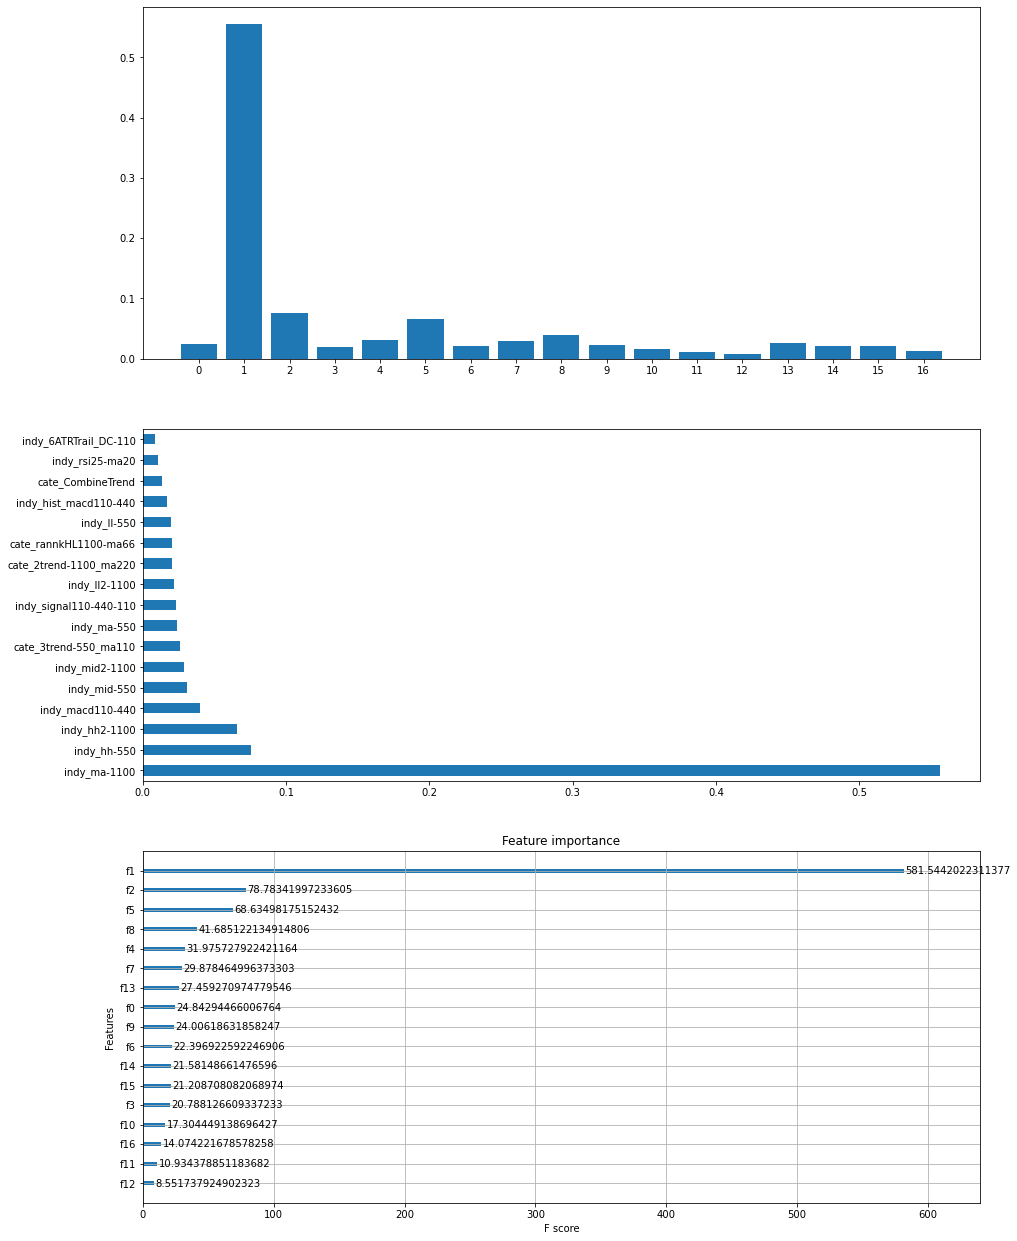

In [19]:
fig,axes=pyplot.subplots(nrows=3,ncols=1,figsize=(15,22))
axes[0].bar(range(len(model.feature_importances_)), model.feature_importances_,tick_label=range(len(model.feature_importances_)))
feature_series.plot(kind='barh',ax=axes[1])
plot_importance(model,ax=axes[2],importance_type='gain')

# TRain By SPlit

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

In [41]:
model = XGBClassifier(n_estimators=nTree,max_depth=mxDepth,learning_rate=learnRate,importance_type='gain')

#model=GradientBoostingClassifier(n_estimators=nTree,max_depth=mxDepth,learning_rate=learnRate)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=80, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:

feature_series=pd.Series(model.feature_importances_, index=X_df.columns).sort_values(ascending=False)
feature_series

indy_ma-1100              0.614180
indy_hh2-1100             0.094669
cate_2trend-1100_ma220    0.031778
cate_rannkHL1100-ma66     0.031034
indy_mid2-1100            0.030838
indy_mid-550              0.027586
indy_ll2-1100             0.025439
indy_macd110-440          0.023406
indy_signal110-440-110    0.019000
cate_3trend-550_ma110     0.017039
indy_hh-550               0.015304
indy_hist_macd110-440     0.015198
indy_ma-550               0.013884
cate_CombineTrend         0.011834
indy_6ATRTrail_DC-110     0.011109
indy_ll-550               0.009621
indy_rsi25-ma20           0.008081
dtype: float32

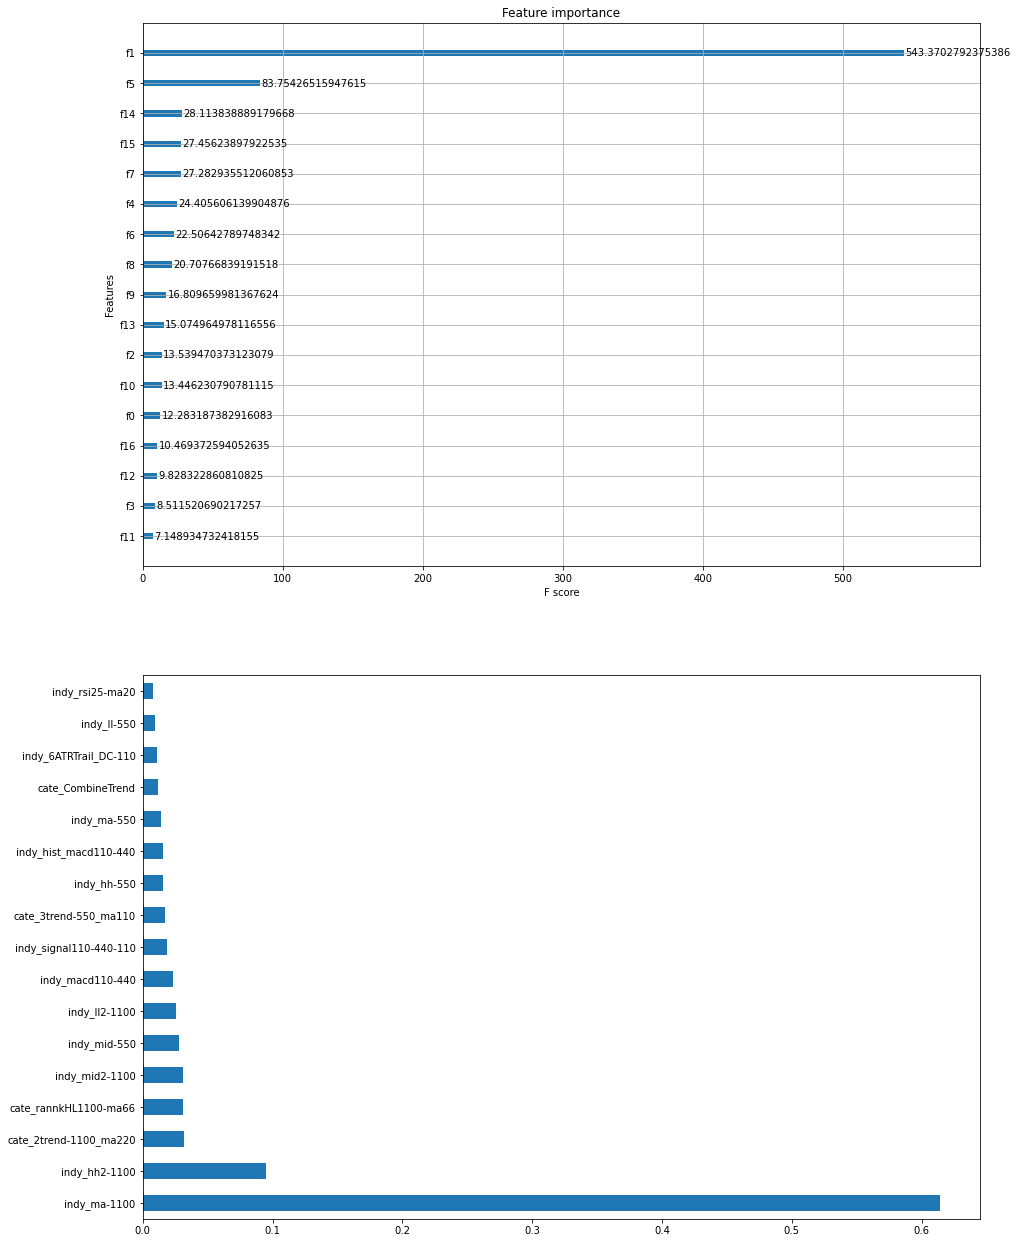

In [43]:
fig,axes=pyplot.subplots(nrows=2,ncols=1,figsize=(15,22))

feature_series.plot(kind='barh',ax=axes[1])
plot_importance(model,ax=axes[0],importance_type='gain')

In [44]:
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.40%


# Feature Selection with XGBoost Feature ImportanceScores

In [46]:
thresholds_all = sort(model.feature_importances_)[::-1]
thresholds=thresholds_all[:6]
thresholds

array([0.61417973, 0.09466872, 0.0317775 , 0.03103421, 0.03083832,
       0.02758603], dtype=float32)

In [47]:
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 
 # train model

 selection_model = XGBClassifier(n_estimators=nTree,max_depth=mxDepth,learning_rate=learnRate,importance_type='gain')

 #selection_model=GradientBoostingClassifier(n_estimators=nTree,max_depth=mxDepth,learning_rate=learnRate)
 
 
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.614, n=1, Accuracy: 79.17%
Thresh=0.095, n=2, Accuracy: 82.62%
Thresh=0.032, n=3, Accuracy: 82.21%
Thresh=0.031, n=4, Accuracy: 81.19%
Thresh=0.031, n=5, Accuracy: 75.80%
Thresh=0.028, n=6, Accuracy: 75.24%
